# Luis Gustavo Peçanha 9806763

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets
import random
from math import sqrt
from sklearn import linear_model
from scipy.special import expit
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from sklearn.model_selection import cross_validate
from mlxtend.plotting import plot_decision_regions
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

## Exercício 1

Faça o pré-processamento dos dados e classifique os pacientes de acordo com a variável “target”. Considere os
classificadores: Bayesiano paramétrico, Bayesiano não-paramétrico e Naive Bayes.

In [2]:
df_1 = pd.read_csv('datasets/heart.csv')
df_1 = df_1.dropna(axis='rows') #remove NaN

### Paramétrico

In [3]:
array_df_1 = df_1.to_numpy()

In [4]:
Y = array_df_1[: , -1]
X = array_df_1[:, 0:len(df_1.columns)-1]

Normalização dos dados.

In [5]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis=0))
print('Desvio Padrao:', np.std(X, axis=0))

Dados transformados:
Media:  [ 4.69005106e-17 -1.40701532e-16  2.34502553e-17 -7.03507659e-16
 -1.11388713e-16 -2.34502553e-17  1.46564096e-16 -6.80057404e-16
 -4.69005106e-17  2.34502553e-17 -1.40701532e-16 -2.34502553e-17
 -1.64151787e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Separando em conjunto de treinamento e teste

In [7]:
p = 0.8 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = p, random_state = 42)

In [8]:
classes = np.array(pd.unique(df_1[df_1.columns[-1]]), dtype=str)
classes = classes.astype('float64')

In [9]:
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes)

In [10]:
Pc = np.zeros(len(classes)) #fraction of elements in each class
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = x_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

In [11]:
print(P)

             1.0           0.0
0   2.001109e-14  1.511054e-10
1   1.174376e-12  5.348235e-12
2   1.275411e-11  1.068613e-12
3   1.509065e-14  5.265177e-12
4   1.036353e-11  1.175595e-14
..           ...           ...
56  3.377823e-12  3.851522e-10
57  3.093257e-08  1.651703e-09
58  3.587985e-16  6.785043e-13
59  2.394387e-14  5.801795e-09
60  6.545471e-14  4.830762e-10

[61 rows x 2 columns]


In [12]:
y_pred = []
#np.array(test_x.shape[0], dtype=str)
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype='int64')
print(y_pred)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]


In [13]:
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8360655737704918


O Classificador Bayesiano Paramétrico obteve uma acurácia de, aproximadamente, 84%. É um desempenho satisfatório.

### Não Paramétrico

In [14]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

In [15]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype='int64')
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.8852459016393442


O Classificador Bayesiano Paramétrico obteve uma acurácia de, aproximadamente, 89%. É um desempenho melhor ainda que o do não paramétrico.

### Naive Bayes

In [16]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8688524590163934


O Classificador Naive Bayes obteve uma acurácia de, aproximadamente, 87%. É um desempenho intermediário entre o paramétrico e não-paramétrico.

# Exercício 2

No classificar não-paramétrico, verifique o efeito do hiperparâmetro h na classificação dos dados de
diabetes, encontrando seu melhor valor:

In [17]:
df_2 = pd.read_csv('datasets/diabetes.csv')

In [20]:
df_2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [21]:
# X = df_2.iloc[:, :8]
# y = df_2.iloc[:, 9]

# Exercíco 3

Considere o código abaixo para gerar dados artificialmente.



Compare os resultados para os métodos Naive Bayes, Classificador Bayesiano paramétrico e o classificador Bayesiano
não-paramétrico, variando o ruído (noise).

### Ruído = 0.05

NOISE: 0.05


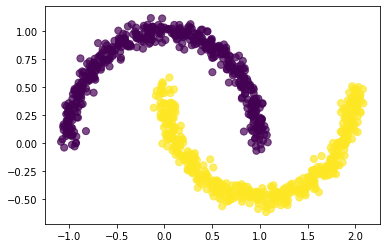

Acurácia Paramétrico: 0.905
Acurácia Não Paramétrico: 0.885
Acurácia Naive Bayes: 0.905
		
NOISE: 0.1


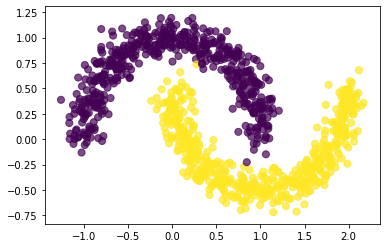

Acurácia Paramétrico: 0.915
Acurácia Não Paramétrico: 0.89
Acurácia Naive Bayes: 0.915
		
NOISE: 0.2


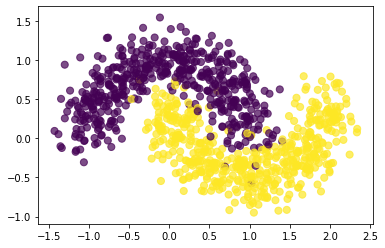

Acurácia Paramétrico: 0.845
Acurácia Não Paramétrico: 0.845
Acurácia Naive Bayes: 0.845
		
NOISE: 0.4


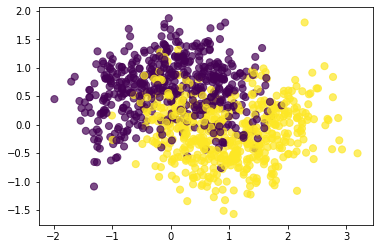

Acurácia Paramétrico: 0.815
Acurácia Não Paramétrico: 0.81
Acurácia Naive Bayes: 0.815
		
NOISE: 0.8


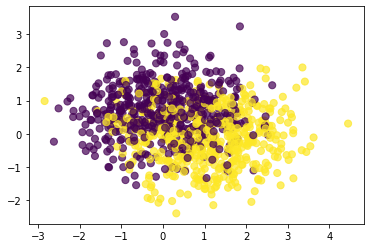

Acurácia Paramétrico: 0.76
Acurácia Não Paramétrico: 0.77
Acurácia Naive Bayes: 0.76
		
NOISE: 1


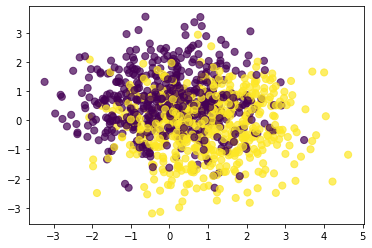

Acurácia Paramétrico: 0.72
Acurácia Não Paramétrico: 0.73
Acurácia Naive Bayes: 0.72
		
NOISE: 2


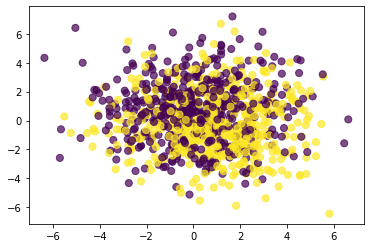

Acurácia Paramétrico: 0.645
Acurácia Não Paramétrico: 0.635
Acurácia Naive Bayes: 0.64
		
NOISE: 4


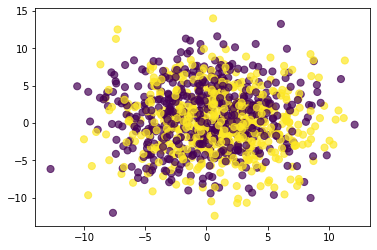

Acurácia Paramétrico: 0.575
Acurácia Não Paramétrico: 0.57
Acurácia Naive Bayes: 0.59
		
NOISE: 8


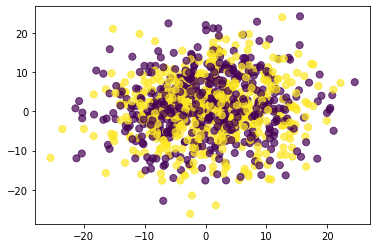

Acurácia Paramétrico: 0.485
Acurácia Não Paramétrico: 0.47
Acurácia Naive Bayes: 0.475
		
NOISE: 10


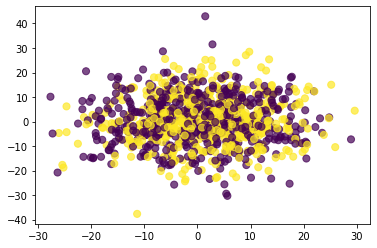

Acurácia Paramétrico: 0.445
Acurácia Não Paramétrico: 0.47
Acurácia Naive Bayes: 0.44
		


In [22]:
for noise in [0.05, 0.10, 0.20, 0.40, 0.80, 1, 2, 4, 8, 10]:
    print('NOISE: {}'.format(noise))
    
    plt.figure(figsize=(6,4))
    n_samples = 1000
    data = datasets.make_moons(n_samples=n_samples, noise=noise)
    X = data[0]
    y = data[1]
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
    plt.show(True)

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

    #----------------------------------------------------
    classes = np.array(pd.unique(df_1[df_1.columns[-1]]), dtype=str)
    classes = classes.astype('float64')
    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes)
    Pc = np.zeros(len(classes)) #fraction of elements in each class
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(y_train == classes[i]))
        Pc[i] = len(elements)/len(y_train)
        Z = x_train[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,x_test.shape[0]):
            x = x_test[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
            P[classes[i]][j] = pj*Pc[i]

    y_pred = []
    #np.array(test_x.shape[0], dtype=str)
    for i in np.arange(0, x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred, dtype='int64')
    #print(y_pred)

    score = accuracy_score(y_pred, y_test)
    print('Acurácia Paramétrico:', score)
    #----------------------------------------------------

    # Matriz que armazena as probabilidades para cada classe
    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
    Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
    h = 2
    for i in np.arange(0, len(classes)): # Para cada classe
        elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
        Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
        Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred, dtype='int64')
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
    print('Acurácia Não Paramétrico:', score)
    #----------------------------------------------------
    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    print('Acurácia Naive Bayes:', score)
    print('\t\t')

Pode observar-se que para ruído com valores = [0.05, 0.10, 0.20], os classificadores apresentam desempenho elevado. No entanto, do 0.40 em diante, sua acurácia tende a piorar somente. No entanto, para o ruído = 8, apresenta uma leve melhora e depois volta a cair novamente.

# Exercício 4

Considerando os dados artificiais do exercício anterior, mostre as regiões de separação para os métodos
Naive Bayes, k-vizinhos e regressão logística.

# Exercício 5

Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

Compare os classificadores Naive Bayes e Bayesiano Paramétrico variando a separação entre as nuvens de pontos
– mantenha a posição de uma classe fixa e mude a posição do centro da outra classe, calculando a distância entre
os centros.

Distancia entre os centros dos pontos: 1.4142135623730951


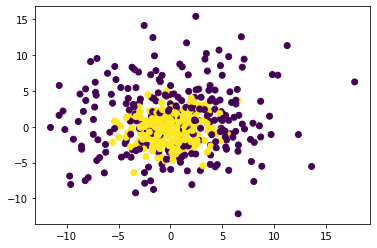

Acurácia Paramétrico:0.82
Acurácia Naive Bayes: 0.81
		
Distancia entre os centros dos pontos: 5.656854249492381


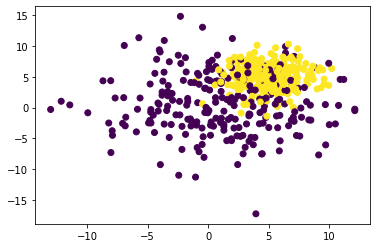

Acurácia Paramétrico:0.84
Acurácia Naive Bayes: 0.84
		
Distancia entre os centros dos pontos: 12.727922061357855


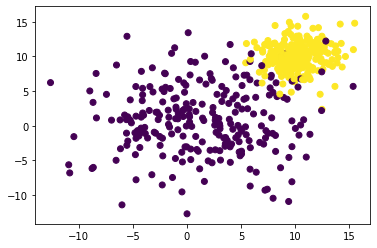

Acurácia Paramétrico:0.98
Acurácia Naive Bayes: 0.98
		
Distancia entre os centros dos pontos: 14.142135623730951


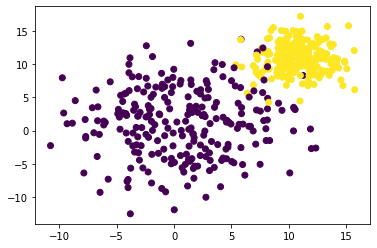

Acurácia Paramétrico:0.99
Acurácia Naive Bayes: 0.99
		
Distancia entre os centros dos pontos: 18.384776310850235


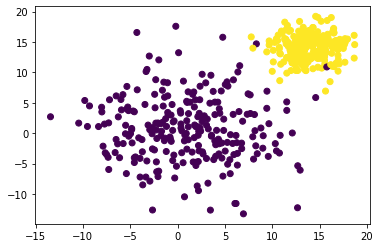

Acurácia Paramétrico:1.0
Acurácia Naive Bayes: 1.0
		
Distancia entre os centros dos pontos: 19.79898987322333


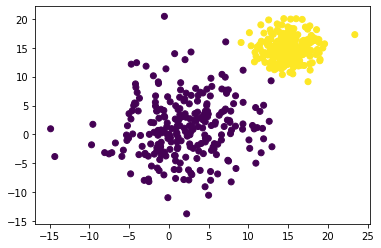

Acurácia Paramétrico:1.0
Acurácia Naive Bayes: 1.0
		
Distancia entre os centros dos pontos: 26.870057685088806


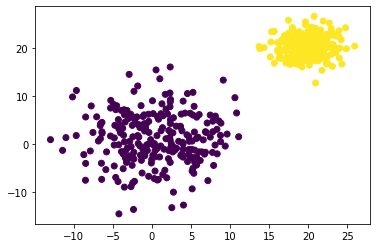

Acurácia Paramétrico:1.0
Acurácia Naive Bayes: 1.0
		


In [23]:
x_p = 10
y_p = 10

for i in (-10, -5, 0, 1, 4, 5, 10):
    noise_x = i
    noise_y = i
    n = 500
    c = [(1,1), (x_p+noise_x, y_p+noise_y)] #center of the points
    distance = sqrt((c[1][0] - c[0][0])**2 + (c[1][1] - c[0][1])**2)
    print('Distancia entre os centros dos pontos: {}'.format(distance))
    std = [5.0, 2] # standard deviation
    nc = [400,50] #number of points in each class
    X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.show(True)

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

    #########################################################
    #Bayesiano Paramétrico

    classes = np.array(pd.unique(df_1[df_1.columns[-1]]), dtype=str)
    classes = classes.astype('float64')
    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes)
    Pc = np.zeros(len(classes)) #fraction of elements in each class
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(y_train == classes[i]))
        Pc[i] = len(elements)/len(y_train)
        Z = x_train[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,x_test.shape[0]):
            x = x_test[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
            P[classes[i]][j] = pj*Pc[i]

    y_pred = []
    #np.array(test_x.shape[0], dtype=str)
    for i in np.arange(0, x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred, dtype='int64')
    #print(y_pred)

    score = accuracy_score(y_pred, y_test)
    print('Acurácia Paramétrico:{}'.format(score))
    #----------------------------------------------------
    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    print('Acurácia Naive Bayes:', score)
    print('\t\t')

Verifica-se que para para grandes distancias entre os centros dos pontos, a acurácia é elevada pois fica fácil distinguir as duas classes quando estão distantes. No entanto, quando há curta distância entre os centros, a tarefa do algoritmo é dificultada, reduzindo a acurácia.

# Exercício 6

Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

Compare os classificadores Naive Bayes, k-vizinhos mais próximos e regressão logística variando o nível de ruído
(noise) no intervalo [0,1]. No caso do algoritmo k-vizinho, use o método selection.GridSearchCV da biblioteca
sciki-learn para determinar a melhor medida de distância e o valor de k.

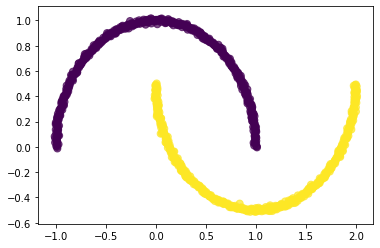

Acurácia Naive Bayes:		 0.855
Acurácia Regressão Logística:	 0.86
Acurácia KNN:			 1.0


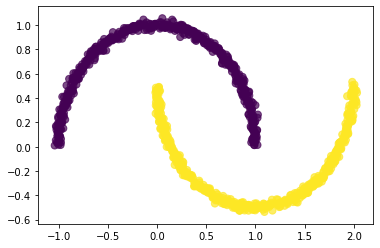

Acurácia Naive Bayes:		 0.865
Acurácia Regressão Logística:	 0.89
Acurácia KNN:			 1.0


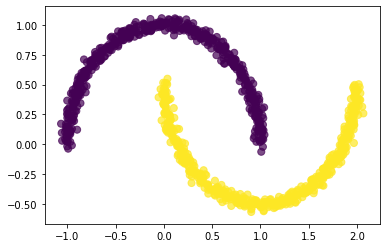

Acurácia Naive Bayes:		 0.85
Acurácia Regressão Logística:	 0.86
Acurácia KNN:			 1.0


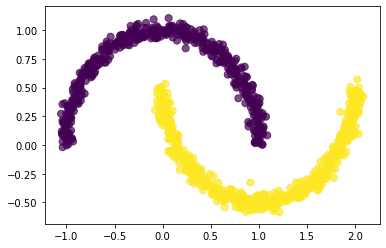

Acurácia Naive Bayes:		 0.895
Acurácia Regressão Logística:	 0.91
Acurácia KNN:			 1.0


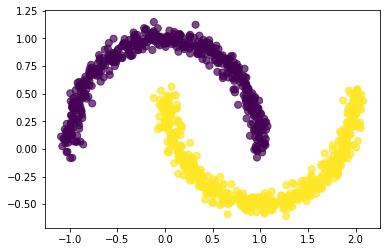

Acurácia Naive Bayes:		 0.89
Acurácia Regressão Logística:	 0.895
Acurácia KNN:			 1.0


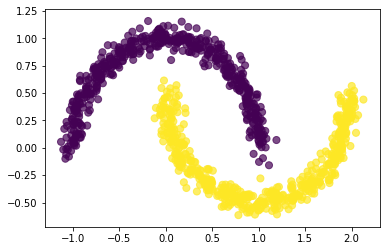

Acurácia Naive Bayes:		 0.88
Acurácia Regressão Logística:	 0.875
Acurácia KNN:			 1.0


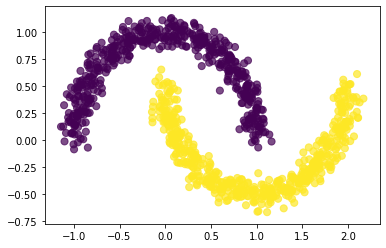

Acurácia Naive Bayes:		 0.895
Acurácia Regressão Logística:	 0.88
Acurácia KNN:			 1.0


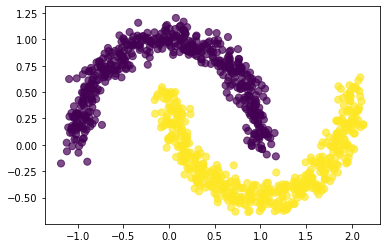

Acurácia Naive Bayes:		 0.925
Acurácia Regressão Logística:	 0.92
Acurácia KNN:			 1.0


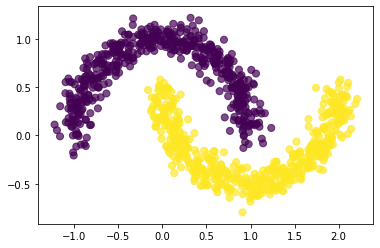

Acurácia Naive Bayes:		 0.89
Acurácia Regressão Logística:	 0.88
Acurácia KNN:			 1.0


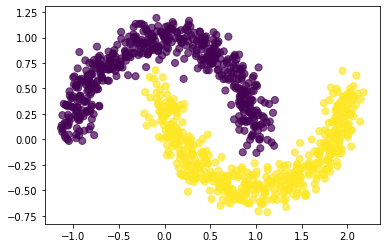

Acurácia Naive Bayes:		 0.9
Acurácia Regressão Logística:	 0.91
Acurácia KNN:			 1.0


In [25]:
for noise in (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10):

    plt.figure(figsize=(6,4))
    n_samples = 1000
    data = datasets.make_moons(n_samples=n_samples, noise=noise)
    X = data[0]
    y = data[1]
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
    plt.show(True)

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

    ##############################
    # Naive Bayes
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print('Acurácia Naive Bayes:\t\t', score)
    
    ##############################
    # Logistic Regression
    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print('Acurácia Regressão Logística:\t', score)

    ##############################
    # KNN
    clf = GridSearchCV(KNeighborsClassifier(), {
        'n_neighbors'          :   range(0, 20)
    }, cv=5, return_train_score=False)

    clf.fit(X_train, y_train)
    knn_search_results = pd.DataFrame(clf.cv_results_)
    max_result = knn_search_results['mean_test_score'].max()
    # Como a separação entre as curvas estão bem definidas, isso retornará vários elementos com média de pontuação 1 (perfeito). Fiz
    # dessa forma para apenas pegar 1 elemento caso ocorra
    best_k_list = list(knn_search_results.loc[knn_search_results['mean_test_score'] == max_result]['param_n_neighbors'])
    best_k = int(best_k_list[0])

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print('Acurácia KNN:\t\t\t', score)

    #knn_search_results[['param_n_neighbors', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(5)

Mesmo com a variação do ruído ainda é facil para o KNN consegui distinguir as classes conseguindo acurácia perfeito. Já o classificador Naive Bayes apresentou grandes dificuldades na sua performance. A Regressão Logística obteve desempenho satisfatório.

# Exercício 7

Considerando os dados do código anterior, compare os algoritmos:  árvores de decisão, forestas aleatórias e bagging.  Use o método selection.GridSearchCV da biblioteca sciki-learn para determinar os melhores parâmetros dos modelos.

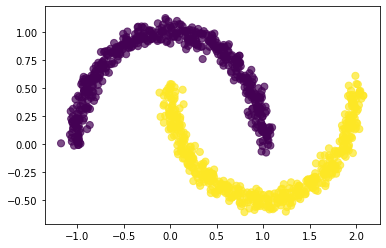

In [26]:
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [27]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [7.14373005e-16 5.90472116e-16]
Desvio Padrao: [1. 1.]


In [29]:
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

## Arvore de Decisão

Hyper parameter tuning

In [30]:
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=101), {
    'criterion'     :   ['gini', 'entropy'],
    'splitter'      :   ['best', 'random'],
    'max_depth'     :   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}, cv=5, return_train_score=False)

clf.fit(x_train, y_train)
decision_tree_search_results = pd.DataFrame(clf.cv_results_)

In [31]:
decision_tree_search_results[['param_criterion', 'param_splitter', 'param_max_depth', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(10)

param_criterion param_splitter param_max_depth  mean_test_score
33         entropy         random               7          0.99875
35         entropy         random               8          0.99875
37         entropy         random               9          0.99625
39         entropy         random              10          0.99625
34         entropy           best               8          0.99375
32         entropy           best               7          0.99375
36         entropy           best               9          0.99375
38         entropy           best              10          0.99375
12            gini           best               7          0.99250
14            gini           best               8          0.99250

    Observa-se que podemos atingir a melhor performance com qualquer valor de 'criterion', com 'splitter' = random e 'max_depth' acima de 6.

In [32]:
# Cria o modelo usando o criterio Gini
model = tree.DecisionTreeClassifier(criterion = 'gini', splitter='random', max_depth = 7, random_state = 101)
# Ajusta o modelo usando os dados de treinamento
model.fit(x_train,y_train)
# realizar a predição
y_pred = model.predict(x_test)

In [33]:
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.995


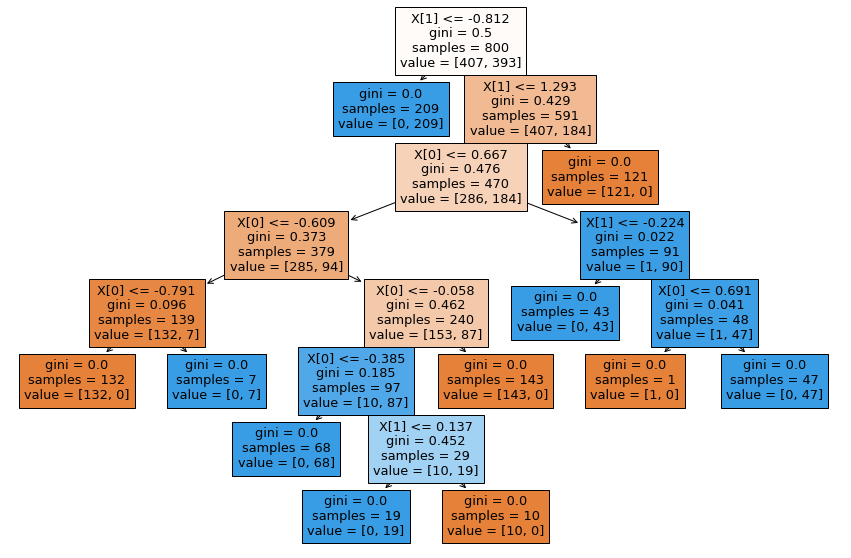

In [34]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show(True)

## Baggings

Hyperparameter Tuning

In [35]:
clf = GridSearchCV(BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101)),{
    'n_estimators'      :   [1, 3, 5, 7, 9, 10, 15, 20],
    'bootstrap'         :   [False, True],
    'oob_score'         :   [False, True],
    'warm_start'        :   [False, True]
}, cv=5, return_train_score=False)

clf.fit(x_train, y_train)
baggings_search_results = pd.DataFrame(clf.cv_results_)

In [36]:
baggings_search_results[['param_n_estimators', 'param_bootstrap', 'param_oob_score', 'param_warm_start', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(10)

param_n_estimators param_bootstrap param_oob_score param_warm_start  \
33                  1            True           False             True   
32                  1            True           False            False   
0                   1           False           False            False   
21                 10           False           False             True   
1                   1           False           False             True   
36                  3            True           False            False   
29                 20           False           False             True   
28                 20           False           False            False   
25                 15           False           False             True   
24                 15           False           False            False   

    mean_test_score  
33          0.99500  
32          0.99500  
0           0.99375  
21          0.99375  
1           0.99375  
36          0.99375  
29          0.99375  
28          0.99375  
25          0.99375  
24          0.99375

Podemos observar que o melhor resultado foi obtido com a seguinte escolha de parametros:
- n_estimators = 3
- bootstrap = True
- oob_score = True
- warm_start = False

In [37]:
model = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101), n_estimators=3, bootstrap=True, oob_score=True, warm_start=False)
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 
# calcula a acurácia do modelo
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 1.0


Variando o número de estimadores

## Florestas Aleatórias

Hyperparameter tuning

Nâo consegui realizar o aprimoramento dos paramêtros aqui. O tempo de execução superou as duas horas e ainda não tinha concluído. Dessa forma, vou utilizar os paramêtros estabelecidos no slide.

In [38]:
# clf = GridSearchCV(RandomForestClassifier(class_weight=None, max_leaf_nodes=None, min_impurity_split=None, min_weight_fraction_leaf=0.0, random_state=None, verbose=0), {
#     'n_estimators'          :   [1, 50, 100],
#     'bootstrap'             :   [False, True],
#     'criterion'             :   ['entropy', 'gini'],
#     'max_depth'             :   [1, 50, 100],
#     'min_impurity_decrease' :   [0.0, 1.0],
#     'min_samples_leaf'      :   [0, 5, 10],
#     'min_samples_split'     :   [2, 3, 5],
#     'n_jobs'                :   [1, -1],
#     'oob_score'             :   [False, True],
#     'warm_start'            :   [False, True]
# }, cv=5, return_train_score=False)

# clf.fit(x_train, y_train)
# random_forest_search_results = pd.DataFrame(clf.cv_results_)

In [39]:
"""random_forest_search_results[['param_n_estimators', 'param_bootstrap', 'param_criterion', 'param_min_impurity_decrease', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_jobs', 'param_oob_score', 'param_warm_start', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(10)"""

"random_forest_search_results[['param_n_estimators', 'param_bootstrap', 'param_criterion', 'param_min_impurity_decrease', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_jobs', 'param_oob_score', 'param_warm_start', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(10)"

In [40]:
# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 1.0


Por tratar-se um conjunto de dados utópico, foram obtidos, também, resultados utópicos com todas as acurácias chegando no resultado perfeito: 1. Dessa forma não foi possível realizar uma comparação entre cada algoritmo de classificação.

# Exercício 8

Considere as bases: Vehicle, winequality-red e vertebralcolumn-3C. Compare os classificadores: (a)
Naive Bayes, (b) Florestas aleatórias, (c) k-vizinhos, (d) regressão logística. Considere as medidas: (i) AUC (área
sob a curva ROC), (ii) precisão, (iii) medida F1 e (iv) acurácia. Ou seja, faça uma tabela para cada base, onde as
linhas representam os classificadores e as colunas, as medidas de avaliação.

## Vehicles

In [41]:
df_vehicles = pd.read_csv('datasets/Vehicle.csv')
df_vehicles.head(5)

Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0    95    48      83     178          72        10      162     42   
1    91    41      84     141          57         9      149     45   
2   104    50     106     209          66        10      207     32   
3    93    41      82     159          63         9      144     46   
4    85    44      70     205         103        52      149     45   

   Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
0            20         159           176           379     184          70   
1            19         143           170           330     158          72   
2            23         158           223           635     220          73   
3            19         143           160           309     127          63   
4            19         144           241           325     188         127   

   Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra Class  
0           6          16         187      197   van  
1           9          14         189      199   van  
2          14           9         188      196  saab  
3           6          10         199      207   van  
4           9          11         180      183   bus

In [42]:
column_names = ['Classificador','AUC ROC', 'Precisão', 'F1', 'Acurácia']
vehicles_table = pd.DataFrame(columns=column_names)

data = df_vehicles.iloc[:, :-1].values
target = df_vehicles.iloc[:, -1].values

scaler = StandardScaler().fit(data)
data = scaler.transform(data)

print('Dados transformados:')
print('Media: ', np.mean(data, axis = 0))
print('Desvio Padrao:', np.std(data, axis = 0))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,random_state=109) # 70% training and 30% test

Dados transformados:
Media:  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Naive Bayes

In [43]:
gnb = GaussianNB()

# Treinando o modelo
gnb.fit(X_train, y_train)

# Prevendo a resposta e gerando probabilidade das respostas
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

nb_values = ['Naive Bayes', auc_roc, precisao, f1, acuracia]
vehicles_table = vehicles_table.append(pd.DataFrame([nb_values], columns=column_names))

AUC ROC:	 0.7819930469694906
Precisão:	 0.5520518830446528
F1:		 0.468757273987926
Acurácia:	 0.5039370078740157


### Random Forest

In [44]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

rf_values = ['Random Forest', auc_roc, precisao, f1, acuracia]

vehicles_table = vehicles_table.append(pd.DataFrame([rf_values], columns=column_names))

AUC ROC:	 0.9330874262082223
Precisão:	 0.7339426193864643
F1:		 0.7406202460930689
Acurácia:	 0.7362204724409449


### K Nearest Neighbors

Investigando um valor adequado para o número de vizinhos do algoritmo.

In [45]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors'          :   range(0, 10)
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train)
knn_search_results = pd.DataFrame(clf.cv_results_)

knn_search_results[['param_n_neighbors', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(5)

param_n_neighbors  mean_test_score
1                 1         0.706110
9                 9         0.701111
3                 3         0.701054
4                 4         0.697693
6                 6         0.692608

Vê-se que o algoritmo obteve melhor desempenho para n_neighbors = 1

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

knn_values = ['KNN', auc_roc, precisao, f1, acuracia]
vehicles_table = vehicles_table.append(pd.DataFrame([knn_values], columns=column_names))

AUC ROC:	 0.7996566543636926
Precisão:	 0.690271223512151
F1:		 0.696535982876316
Acurácia:	 0.6889763779527559


### Logistic Regression

In [47]:
logreg = linear_model.LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

logreg_values = ['Log Reg', auc_roc, precisao, f1, acuracia]
vehicles_table = vehicles_table.append(pd.DataFrame([logreg_values], columns=column_names))

AUC ROC:	 0.7996566543636926
Precisão:	 0.7980444842513807
F1:		 0.8003337844775298
Acurácia:	 0.7952755905511811


In [48]:
vehicles_table

Classificador   AUC ROC  Precisão        F1  Acurácia
0    Naive Bayes  0.781993  0.552052  0.468757  0.503937
0  Random Forest  0.933087  0.733943  0.740620  0.736220
0            KNN  0.799657  0.690271  0.696536  0.688976
0        Log Reg  0.799657  0.798044  0.800334  0.795276

Observando a tabela com os resultados dos classificadores desejados sobre o conjunto de dados Vehicles, destaca-se que a Regressão Logística obteve o melhor desempenho em 3 das 4 medidas. Somente perdeu para o Random Forest na AUC ROC. Dessa forma, podemos concluir que a Regressão Logística foi a vencedora em classificar esse conjunto de dados.

## Wine Equality-Red

In [49]:
df_wine = pd.read_csv('datasets/winequality-red.csv')
df_wine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [50]:
column_names = ['Classificador','AUC ROC', 'Precisão', 'F1', 'Acurácia']
wine_table = pd.DataFrame(columns=column_names)

data = df_wine.iloc[:, :-1].values
target = df_wine.iloc[:, -1].values

scaler = StandardScaler().fit(data)
data = scaler.transform(data)

print('Dados transformados:')
print('Media: ', np.mean(data, axis = 0))
print('Desvio Padrao:', np.std(data, axis = 0))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,random_state=109) # 70% training and 30% test

Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.82155568e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Naive Bayes

In [51]:
gnb = GaussianNB()

# Treinando o modelo
gnb.fit(X_train, y_train)

# Prevendo a resposta e gerando probabilidade das respostas
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

nb_values = ['Naive Bayes', auc_roc, precisao, f1, acuracia]
wine_table = wine_table.append(pd.DataFrame([nb_values], columns=column_names))

AUC ROC:	 0.6316133797190897
Precisão:	 0.28228006568333686
F1:		 0.2847356130124878
Acurácia:	 0.5104166666666666


### Random Forest

In [52]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

rf_values = ['Random Forest', auc_roc, precisao, f1, acuracia]

wine_table = wine_table.append(pd.DataFrame([rf_values], columns=column_names))

AUC ROC:	 0.7873522902993525
Precisão:	 0.3536515707874337
F1:		 0.33029505540748344
Acurácia:	 0.6875


### K Nearest Neighbors

Investigando um valor adequado para o número de vizinhos do algoritmo.

In [53]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors'          :   range(0, 20)
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train)
knn_search_results = pd.DataFrame(clf.cv_results_)

knn_search_results[['param_n_neighbors', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(5)

param_n_neighbors  mean_test_score
10                10         0.587104
11                11         0.585322
18                18         0.583508
16                16         0.582623
15                15         0.581754

Vê-se que o algoritmo obteve melhor desempenho para n_neighbors = 1

In [54]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

knn_values = ['KNN', auc_roc, precisao, f1, acuracia]
wine_table = wine_table.append(pd.DataFrame([knn_values], columns=column_names))

AUC ROC:	 0.7307502889736491
Precisão:	 0.2860517153016638
F1:		 0.2745833403376276
Acurácia:	 0.5875


### Logistic Regression

In [55]:
logreg = linear_model.LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

logreg_values = ['Log Reg', auc_roc, precisao, f1, acuracia]
wine_table = wine_table.append(pd.DataFrame([logreg_values], columns=column_names))

AUC ROC:	 0.7307502889736491
Precisão:	 0.286491990350598
F1:		 0.27544100563902546
Acurácia:	 0.59375


In [56]:
wine_table

Classificador   AUC ROC  Precisão        F1  Acurácia
0    Naive Bayes  0.631613  0.282280  0.284736  0.510417
0  Random Forest  0.787352  0.353652  0.330295  0.687500
0            KNN  0.730750  0.286052  0.274583  0.587500
0        Log Reg  0.730750  0.286492  0.275441  0.593750

Observando a tabela com os resultados dos classificadores desejados sobre o conjunto de dados winequality-red, destaca-se que o Random Forest obteve o melhor desempenho em todas as medidas. No entanto, cabe destacar que todos os algoritmos apresentaram resultados pífios para as medidas Precisão e F1.

## Vertebral Column - 3C

In [57]:
df_vertebral = pd.read_csv('datasets/vertebralcolumn-3C.csv')
df_vertebral.head(5)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia

In [58]:
column_names = ['Classificador','AUC ROC', 'Precisão', 'F1', 'Acurácia']
vertebral_table = pd.DataFrame(columns=column_names)

data = df_vertebral.iloc[:, :-1].values
target = df_vertebral.iloc[:, -1].values

scaler = StandardScaler().fit(data)
data = scaler.transform(data)

print('Dados transformados:')
print('Media: ', np.mean(data, axis = 0))
print('Desvio Padrao:', np.std(data, axis = 0))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,random_state=109) # 70% training and 30% test

Dados transformados:
Media:  [ 1.14603667e-16 -4.58414668e-17 -3.66731735e-16 -5.73018335e-17
  3.55271368e-16 -6.87622002e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1.]


### Naive Bayes

In [59]:
gnb = GaussianNB()

# Treinando o modelo
gnb.fit(X_train, y_train)

# Prevendo a resposta e gerando probabilidade das respostas
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

nb_values = ['Naive Bayes', auc_roc, precisao, f1, acuracia]
vertebral_table = vertebral_table.append(pd.DataFrame([nb_values], columns=column_names))

AUC ROC:	 0.9684936427334279
Precisão:	 0.8527911969940956
F1:		 0.8497354497354498
Acurácia:	 0.8817204301075269


### Random Forest

In [60]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

rf_values = ['Random Forest', auc_roc, precisao, f1, acuracia]

vertebral_table = vertebral_table.append(pd.DataFrame([rf_values], columns=column_names))

AUC ROC:	 0.9616795091324201
Precisão:	 0.8321385902031063
F1:		 0.8280701754385964
Acurácia:	 0.8709677419354839


### K Nearest Neighbors

Investigando um valor adequado para o número de vizinhos do algoritmo.

In [61]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors'          :   range(0, 20)
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train)
knn_search_results = pd.DataFrame(clf.cv_results_)

knn_search_results[['param_n_neighbors', 'mean_test_score']].sort_values(by=['mean_test_score'], ascending=False).head(5)

param_n_neighbors  mean_test_score
15                15         0.797357
14                14         0.783510
13                13         0.778647
1                  1         0.774313
11                11         0.774207

Vê-se que o algoritmo obteve melhor desempenho para n_neighbors = 15

In [62]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

knn_values = ['KNN', auc_roc, precisao, f1, acuracia]
vertebral_table = vertebral_table.append(pd.DataFrame([knn_values], columns=column_names))

AUC ROC:	 0.9451867679158235
Precisão:	 0.7588383838383838
F1:		 0.7506788313239926
Acurácia:	 0.8064516129032258


### Logistic Regression

In [63]:
logreg = linear_model.LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

auc_roc     =   metrics.roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
precisao    =   metrics.precision_score(y_test, y_pred, average='macro')
f1          =   metrics.f1_score(y_test, y_pred, average='macro')
acuracia    =   metrics.accuracy_score(y_test, y_pred)

print("AUC ROC:\t", auc_roc)
print("Precisão:\t", precisao)
print("F1:\t\t", f1)
print("Acurácia:\t", acuracia)

logreg_values = ['Log Reg', auc_roc, precisao, f1, acuracia]
vertebral_table = vertebral_table.append(pd.DataFrame([logreg_values], columns=column_names))

AUC ROC:	 0.9451867679158235
Precisão:	 0.9095238095238095
F1:		 0.8799019607843137
Acurácia:	 0.9139784946236559


In [64]:
vertebral_table

Classificador   AUC ROC  Precisão        F1  Acurácia
0    Naive Bayes  0.968494  0.852791  0.849735  0.881720
0  Random Forest  0.961680  0.832139  0.828070  0.870968
0            KNN  0.945187  0.758838  0.750679  0.806452
0        Log Reg  0.945187  0.909524  0.879902  0.913978

    Observa-se que a Regressão Logística obteve melhor desempenho em todas as medidas, exceto o AUC ROC. Nesse caso, o classificador Naive Bayes foi melhor. Vale destacar que todos os classificadores tiveram desempenho melhor sobre esse conjunto de dados comparado aos dois anteriores.

# ------------------------------------------------------------------------------

# Exercício 9

Considere os código abaixo. Avalie como o desbalanceamento influencia nos resultados usando as
medidas i) AUC (área sob a curva ROC), (ii) precisão, (iii) medida F1 e (iv) acurácia. Elabore um estudo e proceda
com o desenvolvimento dos códigos. Dica: use o método de validação cruzada estratificado na classificação e
discuta a comparação com o caso sem o uso de estratificação.

Counter({0: 9900, 1: 100})


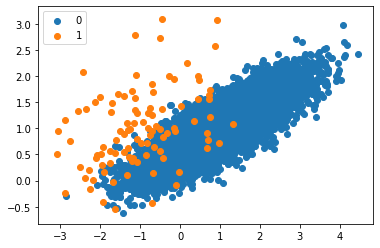

In [65]:
# Generate and plot a synthetic imbalanced classification dataset
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Exercício 10

Realize a classificação da base Titanic. Use os métodos de seleção de modelos e determine o melhor
modelo e seus hiperparâmetros.

Carregando conjunto de treino/teste.

In [66]:
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')
test_survived = pd.read_csv('datasets/titanic/gender_submission.csv')

In [67]:
# Trazendo coluna survived para test
test = pd.merge(test, test_survived, how='left', on=['PassengerId'])
del(test_survived)
# Verificando se houve alguma linha de test sem correspondente em test_survived
test.Survived.isna().sum()
# Não houve

0

In [68]:
print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 12)


In [69]:
# Eliminando colunas desnecessárias

test = test.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
train = train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

train.head(10)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male   NaN      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C

In [70]:
# Transformando atributos nominais em númericos

train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(train)
print(test)

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.0      1      0   7.2500           0         1   
1           1       1  38.0      1      0  71.2833           1         0   
2           1       3  26.0      0      0   7.9250           1         0   
3           1       1  35.0      1      0  53.1000           1         0   
4           0       3  35.0      0      0   8.0500           0         1   
..        ...     ...   ...    ...    ...      ...         ...       ...   
886         0       2  27.0      0      0  13.0000           0         1   
887         1       1  19.0      0      0  30.0000           1         0   
888         0       3   NaN      1      2  23.4500           1         0   
889         1       1  26.0      0      0  30.0000           0         1   
890         0       3  32.0      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1  

In [71]:
# Observando valores nulos
print(train.isnull().sum().sort_values(ascending=False).head(10))
print(test.isnull().sum().sort_values(ascending=False).head(10))

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Pclass          0
dtype: int64
Age           86
Fare           1
Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Survived       0
Parch          0
SibSp          0
dtype: int64


In [72]:
# Atribuindo valores médios as observações com valores nulos

averages = train.mean(axis=0)
nrow,ncol = train.shape
for i in range(0,nrow):
    for j in range(0,ncol):
        if(np.isnan(train.iloc[i,j]) == True):
            train.iloc[i,j] = averages[j]

# substituicao no conjunto de teste
averages_test = test.mean(axis=0)
nrow,ncol = test.shape
for i in range(0,nrow):
    for j in range(0,ncol):
        if(np.isnan(test.iloc[i,j]) == True):
            test.iloc[i,j] = averages_test[j]

In [73]:
train.head(7)

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.000000      1      0   7.2500           0         1   
1         1       1  38.000000      1      0  71.2833           1         0   
2         1       3  26.000000      0      0   7.9250           1         0   
3         1       1  35.000000      1      0  53.1000           1         0   
4         0       3  35.000000      0      0   8.0500           0         1   
5         0       3  29.699118      0      0   8.4583           0         1   
6         0       1  54.000000      0      0  51.8625           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  
5           0           1           0  
6           0           0           1

In [74]:
# Arrumando posição da coluna 'Survive'
survived = test['Survived']
test = test.drop(columns=['Survived'])
test.insert(0, 'Survived', survived)
del(survived)

In [75]:
test.head(7)

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  34.5      0      0   7.8292           0         1   
1         1       3  47.0      1      0   7.0000           1         0   
2         0       2  62.0      0      0   9.6875           0         1   
3         0       3  27.0      0      0   8.6625           0         1   
4         1       3  22.0      1      1  12.2875           1         0   
5         0       3  14.0      0      0   9.2250           0         1   
6         1       3  30.0      0      0   7.6292           1         0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           1           0  
1           0           0           1  
2           0           1           0  
3           0           0           1  
4           0           0           1  
5           0           0           1  
6           0           1           0

In [76]:
# Criando DataFrame como todos os dados para efetuar o Cross-Validation
full_data = pd.concat([train, test])
y = full_data[['Survived']]
X = full_data.drop(columns=['Survived'])
del(full_data)

In [77]:
X = X.values
y = y.values

In [81]:
# Normalização dos dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# scaler = StandardScaler().fit(X_test)
# X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 5.69954066e-17  1.35703349e-17  5.42813396e-18  1.73021770e-17
  1.08562679e-17  7.46368420e-17 -7.46368420e-17  3.52828708e-17
 -8.14220094e-18 -8.14220094e-18]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Encontrando número ideal de k para KNN

Text(0, 0.5, 'Cross-Validated Accuracy')

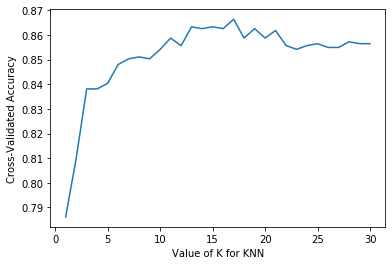

In [82]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
#print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [83]:
# Retorna o indice de k que obteve a maior média no Cross-Valdiation
k_scores.index(max(k_scores))

16

### Encontrando número ideal de estimadores para Random Forest

Text(0, 0.5, 'Cross-Validated Accuracy')

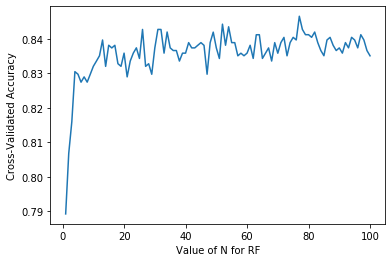

In [84]:
n_range = list(range(1, 101))
n_scores = []
for n in n_range:
    rf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    n_scores.append(scores.mean())
#print(n_scores)

plt.plot(n_range, n_scores)
plt.xlabel('Value of N for RF')
plt.ylabel('Cross-Validated Accuracy')

In [85]:
n_scores.index(max(n_scores))

76

## Comparação de desempenho entre modelos

In [86]:
gnb = GaussianNB()
print(cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean())

0.842730475631239


In [87]:
rf = RandomForestClassifier(n_estimators=87)
print(cross_val_score(rf, X, y, cv=10, scoring='accuracy').mean())

0.8411509101585437


In [88]:
knn = KNeighborsClassifier(n_neighbors=16)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.862571931884909


In [89]:
logreg = linear_model.LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.8503758073987081


Conclui-se que o melhor classificador para esse problema seria o KNN com n = 16. Obteve uma acurácia média de 86% no Cross-Validation.